In [1]:
import marvin

[INFO]: No release version set. Setting default to DR15
[WARNING]: path /Users/richardzhang/sas/mangawork/manga/spectro/redux/v2_4_3/drpall-v2_4_3.fits cannot be found. Setting drpall to None. (MarvinUserWarning)
[WARNING]: path /Users/richardzhang/sas/mangawork/manga/spectro/analysis/v2_4_3/2.2.1/dapall-v2_4_3-2.2.1.fits cannot be found. Setting dapall to None. (MarvinUserWarning)


In [2]:
marvin.config.setRelease('DR16')

[WARNING]: path /Users/richardzhang/sas/dr16/manga/spectro/redux/v2_4_3/drpall-v2_4_3.fits cannot be found. Setting drpall to None. (MarvinUserWarning)
[WARNING]: path /Users/richardzhang/sas/dr16/manga/spectro/analysis/v2_4_3/2.2.1/dapall-v2_4_3-2.2.1.fits cannot be found. Setting dapall to None. (MarvinUserWarning)


# Switch to DR16

In [3]:
marvin.config.release

'DR16'

# Packages Used

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import os.path
from astropy.io import fits
from astropy.table import QTable, Column
import astropy.units as u
from scipy.optimize import minimize
import emcee
import corner

In [5]:
# Physical Constants
c = 3E5 # km * s ^1
h = 1 # reduced hubble constant
H_0 =  100 * h # km * s^-1 * Mpc^-1

In [6]:
# Used files
DTable1 = QTable.read('Master_Table.txt',format='ascii.commented_header')
DTable2 = QTable.read('DRPall-master_file.txt',format='ascii.ecsv')
# Get the Mass of stars & redshifts & angular resolution of r50
m = DTable1['NSA_Mstar'].data
rat = DTable1['NSA_ba'].data
phi = DTable1['NSA_phi'].data
z = DTable2['redshift'].data
r50_ang = DTable2['nsa_elpetro_th50_r'].data

# Functions 
From 1D fitting & Potentially Useful Functions written by Ray Parker & Jacob Smith 

In [7]:
# from GalaxyFitting import likelihood_function
from Rotation_Curve_Functions import vel_b,v_d,vel_h_iso,vel_h_NFW,vel_h_Burket,v_co_iso,v_co_iso_nb,v_co_NFW,v_co_NFW_nb,v_co_Burket,v_co_Burket_nb

In [8]:
# Accessing more data
#all_galaxies = [list of all the galaxy IDs that you want to analyze]
#for galaxy_ID in all_galaxies:
    # use Marvin to access the data for galaxy_ID, or construct the file name for this galaxy on your local computer

# Playing with velocity maps (Plate # 7443)

(<Figure size 432x288 with 2 Axes>,
 <AxesSubplot:title={'center':'Emission line Gaussian velocity: H-alpha 6564'}, xlabel='spaxel', ylabel='spaxel'>)

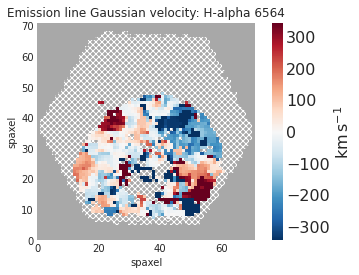

In [9]:
my_cube = marvin.tools.Maps('7443-12701')
gas_vfield = my_cube.emline_gvel_ha_6564
gas_vfield.plot()

(<Figure size 432x288 with 2 Axes>,
 <AxesSubplot:title={'center':'Emission line Gaussian velocity: H-alpha 6564'}, xlabel='spaxel', ylabel='spaxel'>)

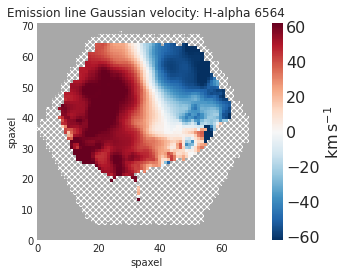

In [10]:
my_cube_2 = marvin.tools.Maps('7443-12702')
gas_vfield_2 = my_cube_2.emline_gvel_ha_6564
gas_vfield_2.plot()

(<Figure size 432x288 with 2 Axes>,
 <AxesSubplot:title={'center':'Emission line Gaussian velocity: H-alpha 6564'}, xlabel='spaxel', ylabel='spaxel'>)

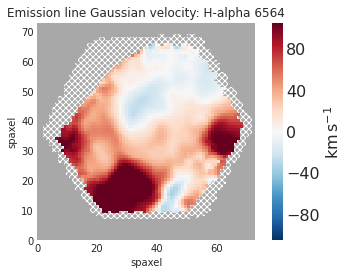

In [11]:
my_cube_3 = marvin.tools.Maps('7443-12703')
gas_vfield_3 = my_cube_3.emline_gvel_ha_6564
gas_vfield_3.plot()

(<Figure size 432x288 with 2 Axes>,
 <AxesSubplot:title={'center':'Emission line Gaussian velocity: H-alpha 6564'}, xlabel='spaxel', ylabel='spaxel'>)

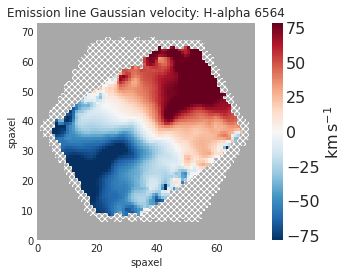

In [12]:
my_cube_4 = marvin.tools.Maps('7443-12704')
gas_vfield_4 = my_cube_4.emline_gvel_ha_6564
gas_vfield_4.plot()

<Marvin Map (property='emline_gvel_ha_6564')>
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]] km / s

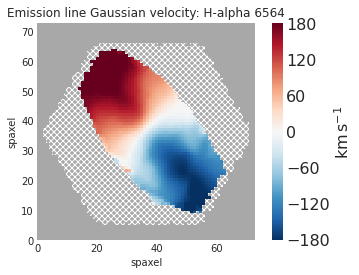

In [13]:
# Gas velocity map 
my_cube_5 = marvin.tools.Maps('7443-12705')
gas_vfield_5 = my_cube_5.emline_gvel_ha_6564
gas_vfield_5.plot()
gas_vfield_5

In [14]:
# Error for analysis
gas_ivar_5 = gas_vfield_5.ivar

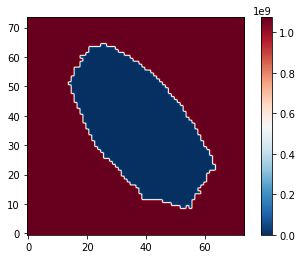

In [15]:
# mask for 7443-12705
plt.imshow(gas_vfield_5.mask,origin='lower',cmap='RdBu_r')
plt.colorbar()

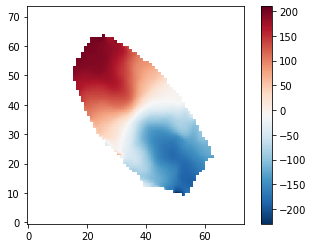

In [16]:
# Making a masked array
import numpy.ma as ma
v_mask = ma.array(gas_vfield_5.data,mask=gas_vfield_5.mask)
plt.imshow(v_mask,origin='lower',cmap='RdBu_r')
plt.colorbar()

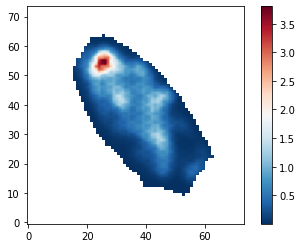

In [17]:
err_mask = ma.array(gas_ivar_5.data,mask=gas_vfield_5.mask)
plt.imshow(err_mask,origin='lower',cmap='RdBu_r')
plt.colorbar()

In [18]:
#plt.imshow(v_map,origin='lower',cmap='RdBu_r')
#plt.colorbar()

In [19]:
# Creating a circular model map
def model_velocity_map(shape,logM,r_d,rho_h,r_h,scale,center):
    model_map = np.zeros(shape)
    
    params = logM,r_d,rho_h,r_h
    
    for i in range(shape[0]):
        for j in range(shape[1]):
            r = np.sqrt((i-center[0])**2+(j-center[1])**2)
            r_in_kpc = r*scale
            
            model_map[i,j] = v_co_Burket_nb(r_in_kpc,params)
    return model_map

In [20]:
# Testing the circular velocity map
gal_shape = [74,74]
gal_redshift = 0.06447352468967438
gal_center = [37,37]

#v_map = model_velocity_map(gal_shape,11,10,0.005,20,gal_scale,gal_center)

In [21]:
# Inclined Velocity Field
def inclined_velocity_map(shape,logM,r_d,rho_h,r_h,center,inclination):
    inclined_map = np.zeros(shape)
    
    params = logM,r_d,rho_h,r_h
    
    for i in range(shape[0]):
        for j in range(shape[1]):
            x = (i-center[0])/np.cos(inclination)
            y = (j-center[1])
            r = np.sqrt(x**2+y**2)
            theta = np.arcsin(x/r)
            r_in_kpc = r*0.4688
            v = v_co_Burket_nb(r_in_kpc,params)*np.sin(inclination)*np.sin(theta)
            inclined_map[i,j] = v
    return inclined_map

[WARNING]: invalid value encountered in double_scalars (RuntimeWarning)
[WARNING]: invalid value encountered in double_scalars (RuntimeWarning)


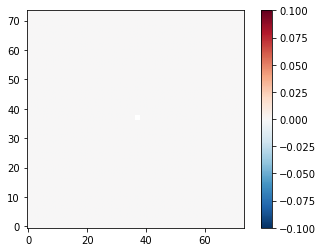

In [22]:
inclined_v_map_0 = inclined_velocity_map(gal_shape,10,6,0.005,20,gal_center,0)
plt.imshow(inclined_v_map_0,origin='lower',cmap='RdBu_r')
plt.colorbar()
plt.show()

[WARNING]: invalid value encountered in double_scalars (RuntimeWarning)


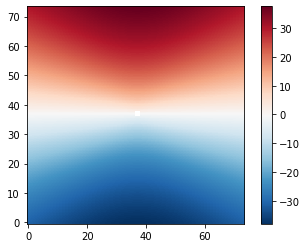

In [23]:
inclined_v_map_18 = inclined_velocity_map(gal_shape,10,6,0.005,20,gal_center,np.pi/10)
plt.imshow(inclined_v_map_18,origin='lower',cmap='RdBu_r')
plt.colorbar()

[WARNING]: invalid value encountered in double_scalars (RuntimeWarning)


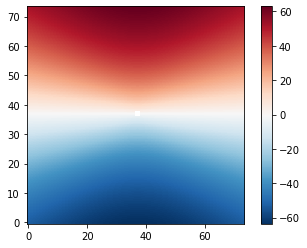

In [24]:
inclined_v_map_30 = inclined_velocity_map(gal_shape,10,6,0.005,20,gal_center,np.pi/6)
plt.imshow(inclined_v_map_30,origin='lower',cmap='RdBu_r')
plt.colorbar()

[WARNING]: invalid value encountered in double_scalars (RuntimeWarning)


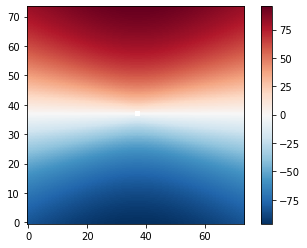

In [25]:
inclined_v_map_45 = inclined_velocity_map(gal_shape,10,6,0.005,20,gal_center,np.pi/4)
plt.imshow(inclined_v_map_45,origin='lower',cmap='RdBu_r')
plt.colorbar()

[WARNING]: invalid value encountered in double_scalars (RuntimeWarning)


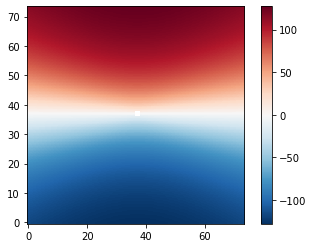

In [26]:
inclined_v_map_60 = inclined_velocity_map(gal_shape,10,6,0.005,20,gal_center,np.pi/3)
plt.imshow(inclined_v_map_60,origin='lower',cmap='RdBu_r')
plt.colorbar()

[WARNING]: The maximum number of subdivisions (50) has been achieved. (IntegrationWarning)
[WARNING]: invalid value encountered in double_scalars (RuntimeWarning)


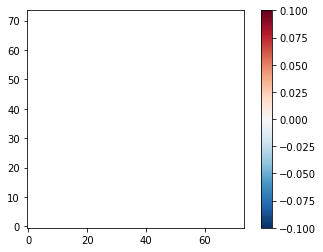

In [27]:
inclined_v_map_90 = inclined_velocity_map(gal_shape,10,6,0.005,15,gal_center,np.pi/2)
plt.imshow(inclined_v_map_90,origin='lower',cmap='RdBu_r')
plt.colorbar()

# 7443-12705

Useful values from data

In [28]:
# Obtain the effective radius for plate IFU 7443-12705
r50_spec = 0
z_spec = 0
for i in range(len(DTable2)):
    if DTable2['MaNGA_plate'][i] == 7443 and DTable2['MaNGA_IFU'][i] == 12705:
        r50_spec = r50_ang[i]
        z_spec = z[i]

# Obtain stellar mass of 7443-12705
m_spec = 0
for i in range(len(DTable1)):
    if DTable1['MaNGA_plate'][i] == 7443 and DTable1['MaNGA_IFU'][i] == 12705:
        m_spec = m[i]
print(np.log10(m_spec))

# Obtain inclination
incl = 0
for i in range(len(DTable1)):
    if DTable1['MaNGA_plate'][i] == 7443 and DTable1['MaNGA_IFU'][i] == 12705:
        incl = np.arccos(rat[i])
print(incl)

# Obtain phi
ph = 0
for i in range(len(DTable1)):
    if DTable1['MaNGA_plate'][i] == 7443 and DTable1['MaNGA_IFU'][i] == 12705:
        ph = phi[i]*np.pi/180
print(ph)

#  Calculate the recession velocity for 7443-12705
v_rec = z_spec * c # km/s

# Using Hubble's Law to calculate distance [kpc] for 7443-12705
d = v_rec/H_0 # Mpc
d *= 1E3 # kpc

# Using Small Angle Formula to calculate the actual value of r50 [kpc] for 7443-12705
theta = r50_spec/206265 # radian
r50 = theta * d # kpc
print(r50)
print(z_spec)
print(d)
scale_spec = 0.5*(193420.5)/206265
print(scale_spec)

10.353951647911828
1.2005955251079776
0.6421872084106552
6.912622583739364
0.0644735
193420.5
0.46886408261217366


# Functions for the different halo models

Isothermal Model

In [29]:
def rot_incl_iso(shape,params):
    A, Vin, logMdisk, Rd, Vinf, Rh,inclination,phi,center_x,center_y = params
    rotated_inclined_map = np.zeros(shape)
    
    for i in range(shape[0]):
        for j in range(shape[1]):
            x = ((i-center_x)*np.cos(phi) - np.sin(phi)*(j-center_y))/np.cos(inclination)
            y = ((i-center_x)*np.sin(phi) + np.cos(phi)*(j-center_y))
            r = np.sqrt(x**2+y**2)
            theta = np.arcsin(x/r)
            r_in_kpc = r*scale_spec
            v = v_co_iso(r_in_kpc,[A, Vin, logMdisk, Rd, Vinf, Rh])*np.sin(inclination)*np.sin(theta)
            rotated_inclined_map[i,j] = v
    return rotated_inclined_map

Isothermal Model w/o Bulge

In [30]:
def rot_incl_iso_nb(shape,params):
    logMdisk, Rd, Vinf, Rh,inclination,phi,center_x,center_y = params
    rotated_inclined_map = np.zeros(shape)
    
    for i in range(shape[0]):
        for j in range(shape[1]):
            x = ((i-center_x)*np.cos(phi) - np.sin(phi)*(j-center_y))/np.cos(inclination)
            y = ((i-center_x)*np.sin(phi) + np.cos(phi)*(j-center_y))
            r = np.sqrt(x**2+y**2)
            theta = np.arcsin(x/r)
            r_in_kpc = r*scale_spec
            v = v_co_iso_nb(r_in_kpc,[logMdisk, Rd, Vinf, Rh])*np.sin(inclination)*np.sin(theta)
            rotated_inclined_map[i,j] = v
    return rotated_inclined_map

NFW Model

In [31]:
def rot_incl_NFW(shape,params):
    A, Vin,logM,r_d,rho_h,r_h,inclination,phi,center_x,center_y = params
    rotated_inclined_map = np.zeros(shape)
    
    for i in range(shape[0]):
        for j in range(shape[1]):
            x = ((i-center_x)*np.cos(phi) - np.sin(phi)*(j-center_y))/np.cos(inclination)
            y = ((i-center_x)*np.sin(phi) + np.cos(phi)*(j-center_y))
            r = np.sqrt(x**2+y**2)
            theta = np.arcsin(x/r)
            r_in_kpc = r*scale_spec
            v = v_co_NFW(r_in_kpc,[A,Vin,logM,r_d,rho_h,r_h])*np.sin(inclination)*np.sin(theta)
            rotated_inclined_map[i,j] = v
    return rotated_inclined_map

NFW Model w/o Bulge

In [32]:
def rot_incl_NFW_nb(shape,params):
    logM,r_d,rho_h,r_h,inclination,phi,center_x,center_y = params
    rotated_inclined_map = np.zeros(shape)
    
    for i in range(shape[0]):
        for j in range(shape[1]):
            x = ((i-center_x)*np.cos(phi) - np.sin(phi)*(j-center_y))/np.cos(inclination)
            y = ((i-center_x)*np.sin(phi) + np.cos(phi)*(j-center_y))
            r = np.sqrt(x**2+y**2)
            theta = np.arcsin(x/r)
            r_in_kpc = r*scale_spec
            v = v_co_NFW_nb(r_in_kpc,[logM,r_d,rho_h,r_h])*np.sin(inclination)*np.sin(theta)
            rotated_inclined_map[i,j] = v
    return rotated_inclined_map

Burket Model 

In [33]:
def rot_incl_bur(shape,params):
    A, Vin,logM,r_d,rho_h,r_h,inclination,phi,center_x,center_y = params
    rotated_inclined_map = np.zeros(shape)
    
    for i in range(shape[0]):
        for j in range(shape[1]):
            x = ((i-center_x)*np.cos(phi) - np.sin(phi)*(j-center_y))/np.cos(inclination)
            y = ((i-center_x)*np.sin(phi) + np.cos(phi)*(j-center_y))
            r = np.sqrt(x**2+y**2)
            theta = np.arcsin(x/r)
            r_in_kpc = r*scale_spec
            v = v_co_Burket(r_in_kpc,[A,Vin,logM,r_d,rho_h,r_h])*np.sin(inclination)*np.sin(theta)
            rotated_inclined_map[i,j] = v
    return rotated_inclined_map

Burket Model w/o Bulge

In [34]:
def rot_incl_bur_nb(shape,params):
    logM,r_d,rho_h,r_h,inclination,phi,center_x,center_y = params
    rotated_inclined_map = np.zeros(shape)
    
    for i in range(shape[0]):
        for j in range(shape[1]):
            x = ((i-center_x)*np.cos(phi) - np.sin(phi)*(j-center_y))/np.cos(inclination)
            y = ((i-center_x)*np.sin(phi) + np.cos(phi)*(j-center_y))
            r = np.sqrt(x**2+y**2)
            theta = np.arcsin(x/r)
            r_in_kpc = r*0.4688
            v = v_co_Burket_nb(r_in_kpc,[logM,r_d,rho_h,r_h])*np.sin(inclination)*np.sin(theta)
            rotated_inclined_map[i,j] = v
    return rotated_inclined_map

# Fitting 
Loglikelihood functions

In [35]:
def loglikelihood_iso(params, shape, vdata, ivar):
    # Construct the model
    model = rot_incl_iso(shape, params)
    inv_sigma2 = ivar ** 2
    logL = -0.5 * np.nansum((vdata - model) ** 2 * inv_sigma2 - np.log(inv_sigma2))
    return logL

def nloglikelihood_iso(params, shape, vdata, ivar):
    return -loglikelihood_iso(params, shape, vdata, ivar)

In [36]:
def loglikelihood_iso_nb(params, shape, vdata, ivar):
    # Construct the model
    model = rot_incl_iso_nb(shape, params)
    inv_sigma2 = ivar ** 2
    logL = -0.5 * np.nansum((vdata - model) ** 2 * inv_sigma2 - np.log(inv_sigma2))
    return logL

def nloglikelihood_iso_nb(params, shape, vdata, ivar):
    return -loglikelihood_iso_nb(params, shape, vdata, ivar)

In [37]:
def loglikelihood_NFW(params, shape, vdata, ivar):
    # Construct the model
    model = rot_incl_NFW(shape, params)
    inv_sigma2 = ivar ** 2
    logL = -0.5 * np.nansum((vdata - model) ** 2 * inv_sigma2 - np.log(inv_sigma2))
    return logL

def nloglikelihood_NFW(params, shape, vdata, ivar):
    return -loglikelihood_NFW(params, shape, vdata, ivar)

In [38]:
def loglikelihood_NFW_nb(params, shape, vdata, ivar):
    # Construct the model
    model = rot_incl_NFW_nb(shape, params)
    inv_sigma2 = ivar ** 2
    logL = -0.5 * np.nansum((vdata - model) ** 2 * inv_sigma2 - np.log(inv_sigma2))
    return logL

def nloglikelihood_NFW_nb(params, shape, vdata, ivar):
    return -loglikelihood_NFW_nb(params, shape, vdata, ivar)

In [39]:
def loglikelihood_bur(params, shape, vdata, ivar):
    # Construct the model
    model = rot_incl_bur(shape, params)
    inv_sigma2 = ivar ** 2
    logL = -0.5 * np.nansum((vdata - model) ** 2 * inv_sigma2 - np.log(inv_sigma2))
    return logL

def nloglikelihood_bur(params, shape, vdata, ivar):
    return -loglikelihood_bur(params, shape, vdata, ivar)

In [40]:
def loglikelihood_bur_nb(params, shape, vdata, ivar):
    # Construct the model
    model = rot_incl_bur_nb(shape, params)
    inv_sigma2 = ivar ** 2
    logL = -0.5 * np.nansum((vdata - model) ** 2 * inv_sigma2 - np.log(inv_sigma2))
    return logL

def nloglikelihood_bur_nb(params, shape, vdata, ivar):
    return -loglikelihood_bur_nb(params, shape, vdata, ivar)

Isothermal Fitting

[WARNING]: invalid value encountered in double_scalars (RuntimeWarning)
[WARNING]: divide by zero encountered in double_scalars (RuntimeWarning)
[WARNING]: invalid value encountered in double_scalars (RuntimeWarning)
[WARNING]: divide by zero encountered in log (RuntimeWarning)
[WARNING]: Warning: converting a masked element to nan. (UserWarning)


---------------------------------------------------
      fun: masked
 hess_inv: <10x10 LbfgsInvHessProduct with dtype=float64>
      jac: array([-1.56469736e+05, -1.25188459e+03, -3.07830202e+06,  2.78708899e+05,
       -3.42670556e+03,  5.37796833e+04, -7.37117758e+06,  4.57222571e+04,
        1.27637756e+18,  7.97284457e+17])
  message: b'ABNORMAL_TERMINATION_IN_LNSRCH'
     nfev: 22
      nit: 0
     njev: 2
   status: 2
  success: False
        x: array([  0.4       , 100.        ,  10.35395165,   4.        ,
       150.        ,  15.        ,   0.5       ,   0.64218721,
        37.        ,  37.        ])


(<Figure size 432x288 with 2 Axes>,
 <AxesSubplot:title={'center':'Emission line Gaussian velocity: H-alpha 6564'}, xlabel='spaxel', ylabel='spaxel'>)

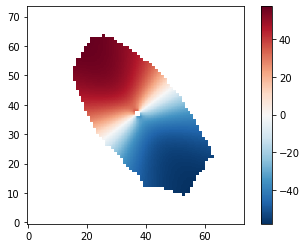

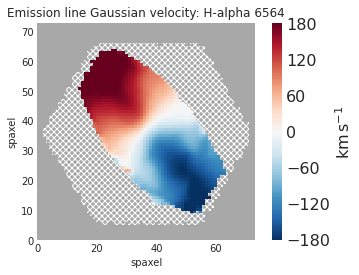

In [190]:
# Initial guesses
param_bounds_iso = [[0.2, 1],  # Scale Factor [unitless]
                [0.001, 1000],  # Bulge Scale Velocity [km/s]
                [np.log10(m_spec), 13],  # Disk mass [log(Msun)]
                [0.1, 20],  # Disk radius [kpc]
                [50, 500],  # Velocity at infinity [km/s]
                [0.1, 100],  # Halo radius [kpc]
                [0.1,np.pi/2], # Inclination angle
                [-np.pi/2,np.pi/2],# Phase angle
                [0.1,40],#center_x
                [0.1,40]] #center_y
p0_iso = [0.4,100,10, 4, 150, 15, 0.5,ph,37,37]
bestfit_iso = minimize(nloglikelihood_iso, p0_iso, args=(gal_shape, v_mask, gas_ivar_5),bounds=param_bounds_iso)
print('---------------------------------------------------')
print(bestfit_iso)
# Plotting Isothermal
bestfit_param_iso = [bestfit_iso.x[0],bestfit_iso.x[1],bestfit_iso.x[2],bestfit_iso.x[3],bestfit_iso.x[4],bestfit_iso.x[5],bestfit_iso.x[6],bestfit_iso.x[7],bestfit_iso.x[8],bestfit_iso.x[9]]
model_map_iso = rot_incl_iso(gal_shape,bestfit_param_iso)
mask_model_map_iso = ma.array(model_map_iso,mask=gas_vfield_5.mask)
plt.imshow(mask_model_map_iso,origin='lower',cmap='RdBu_r')
plt.colorbar()
gas_vfield_5.plot()

In [196]:
# Chi-square calculation
chi_square_iso = np.nansum((v_mask - mask_model_map_iso) ** 2 * gas_ivar_5)
chi_square_iso

6090431.473068214

Isothermal Fitting w/o Bulge

[WARNING]: invalid value encountered in double_scalars (RuntimeWarning)
[WARNING]: invalid value encountered in double_scalars (RuntimeWarning)
[WARNING]: divide by zero encountered in log (RuntimeWarning)
[WARNING]: Warning: converting a masked element to nan. (UserWarning)


---------------------------------------------------
      fun: masked
 hess_inv: <8x8 LbfgsInvHessProduct with dtype=float64>
      jac: array([-2.01672373e+06,  2.01030542e+05, -4.89940478e+03,  7.72026304e+04,
       -6.52102545e+06,  5.08581286e+04,  1.82006115e+09,  1.82000010e+09])
  message: b'ABNORMAL_TERMINATION_IN_LNSRCH'
     nfev: 18
      nit: 0
     njev: 2
   status: 2
  success: False
        x: array([ 10.        ,   4.        , 150.        ,  15.        ,
         0.5       ,   0.64218721,  37.        ,  37.        ])


(<Figure size 432x288 with 2 Axes>,
 <AxesSubplot:title={'center':'Emission line Gaussian velocity: H-alpha 6564'}, xlabel='spaxel', ylabel='spaxel'>)

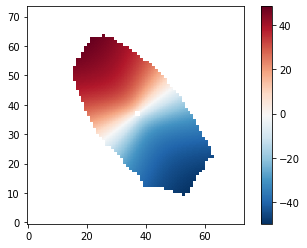

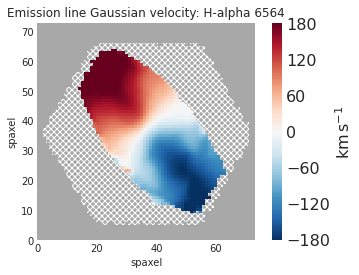

In [187]:
# Initial guesses
param_bounds_iso_nb = [[8, 13],  # Disk mass [log(Msun)]
                [0.001, 20],  # Disk radius [kpc]
                [50, 500],  # Velocity at infinity [km/s]
                [0.1, 100],  # Halo radius [kpc]
                [0.1,np.pi/2], # Inclination angle
                [-np.pi/2,np.pi/2],# Phase angle
                [0.1,40],#center_x
                [0.1,40]] #center_yX
p0_iso_nb = [10, 4, 150, 15, 0.5, ph, 37, 37]
bestfit_iso_nb = minimize(nloglikelihood_iso_nb, p0_iso_nb, args=(gal_shape, v_mask, gas_ivar_5),bounds=param_bounds_iso_nb)
print('---------------------------------------------------')
print(bestfit_iso_nb)
# Plotting Isothermal
bestfit_param_iso_nb = [bestfit_iso_nb.x[0],bestfit_iso_nb.x[1],bestfit_iso_nb.x[2],bestfit_iso_nb.x[3],bestfit_iso_nb.x[4],bestfit_iso_nb.x[5],bestfit_iso_nb.x[6],bestfit_iso_nb.x[7]]
model_map_iso_nb = rot_incl_iso_nb(gal_shape,bestfit_param_iso_nb)
mask_model_map_iso_nb= ma.array(model_map_iso_nb,mask=gas_vfield_5.mask)
plt.imshow(mask_model_map_iso_nb,origin='lower',cmap='RdBu_r')
plt.colorbar()
gas_vfield_5.plot()

In [197]:
# Chi-square calculation
chi_square_iso_nb = np.nansum((v_mask - mask_model_map_iso_nb) ** 2 * gas_ivar_5)
chi_square_iso_nb

7611905.073918322

NFW Fitting

[WARNING]: invalid value encountered in double_scalars (RuntimeWarning)
[WARNING]: divide by zero encountered in double_scalars (RuntimeWarning)
[WARNING]: invalid value encountered in double_scalars (RuntimeWarning)
[WARNING]: Extremely bad integrand behavior occurs at some points of the (IntegrationWarning)
[WARNING]: divide by zero encountered in log (RuntimeWarning)
[WARNING]: The maximum number of subdivisions (50) has been achieved. (IntegrationWarning)
[WARNING]: Warning: converting a masked element to nan. (UserWarning)


---------------------------------------------------
      fun: 43654.23621646818
 hess_inv: <10x10 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 0.00000000e+00, -7.27595761e-04,  1.35114522e+00, -1.23691280e-01,
       -1.65414699e+05, -1.85282377e+01,  8.61837180e+00,  1.30021362e+00,
        7.78527400e-02, -7.63975486e-02])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 7623
      nit: 603
     njev: 693
   status: 0
  success: True
        x: array([2.00000000e-01, 1.00054733e-03, 1.19541854e+01, 6.14741044e+00,
       1.00000000e-02, 1.00000000e+02, 2.77511452e-01, 7.17743345e-01,
       3.58297866e+01, 3.57994913e+01])


(<Figure size 432x288 with 2 Axes>,
 <AxesSubplot:title={'center':'Emission line Gaussian velocity: H-alpha 6564'}, xlabel='spaxel', ylabel='spaxel'>)

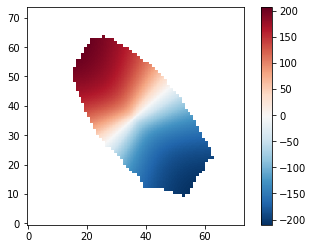

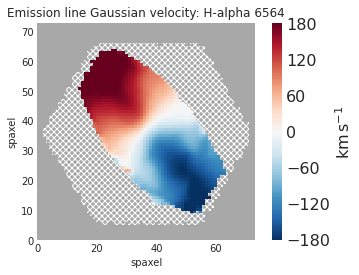

In [189]:
# Initial guesses
param_bounds_NFW = [[0.2, 1],  # Scale Factor [unitless]
                [0.001, 1000],  # Bulge Scale Velocity [km/s]
                [np.log10(m_spec), 13],  # Disk mass [log(Msun)]
                [0.1, 20],  # Disk radius [kpc]
                [0.00001, 0.01],  # Halo density [Msun/pc^2]
                [0.1, 100],  # Halo radius [kpc]
                [0.1,np.pi/2], # Inclination angle
                [-np.pi/2,np.pi/2],# Phase angle
                [0.1,40],#center_x
                [0.1,40]] #center_y
p0_NFW = [0.4,100,10, 4, 0.001, 15, 0.5,ph,37,37]
bestfit_NFW = minimize(nloglikelihood_NFW, p0_NFW, args=(gal_shape, v_mask, gas_ivar_5),bounds=param_bounds_NFW)
print('---------------------------------------------------')
print(bestfit_NFW)
# Plotting NFW
bestfit_param_NFW = [bestfit_NFW.x[0],bestfit_NFW.x[1],bestfit_NFW.x[2],bestfit_NFW.x[3],bestfit_NFW.x[4],bestfit_NFW.x[5],bestfit_NFW.x[6],bestfit_NFW.x[7],bestfit_NFW.x[8],bestfit_NFW.x[9]]
model_map_NFW = rot_incl_NFW(gal_shape,bestfit_param_NFW)
mask_model_map_NFW= ma.array(model_map_NFW,mask=gas_vfield_5.mask)
plt.imshow(mask_model_map_NFW,origin='lower',cmap='RdBu_r')
plt.colorbar()
gas_vfield_5.plot()

In [198]:
# Chi-square calculation
chi_square_NFW = np.nansum((v_mask - mask_model_map_NFW) ** 2 * gas_ivar_5)
chi_square_NFW

203808.19506922184

NFW Fitting w/o Bulge

[WARNING]: invalid value encountered in double_scalars (RuntimeWarning)
[WARNING]: invalid value encountered in double_scalars (RuntimeWarning)
[WARNING]: divide by zero encountered in double_scalars (RuntimeWarning)
[WARNING]: Extremely bad integrand behavior occurs at some points of the (IntegrationWarning)
[WARNING]: divide by zero encountered in log (RuntimeWarning)
[WARNING]: The maximum number of subdivisions (50) has been achieved. (IntegrationWarning)
[WARNING]: Warning: converting a masked element to nan. (UserWarning)


---------------------------------------------------
      fun: masked
 hess_inv: <8x8 LbfgsInvHessProduct with dtype=float64>
      jac: array([-3.43969203e+06,  3.23189331e+05, -3.30718631e+08, -3.41506647e+04,
       -6.70065960e+06,  3.86887228e+04,  1.81984853e+09,  1.82015898e+09])
  message: b'ABNORMAL_TERMINATION_IN_LNSRCH'
     nfev: 18
      nit: 0
     njev: 2
   status: 2
  success: False
        x: array([1.03539516e+01, 4.00000000e+00, 1.00000000e-03, 1.50000000e+01,
       5.00000000e-01, 6.42187208e-01, 3.70000000e+01, 3.70000000e+01])


(<Figure size 432x288 with 2 Axes>,
 <AxesSubplot:title={'center':'Emission line Gaussian velocity: H-alpha 6564'}, xlabel='spaxel', ylabel='spaxel'>)

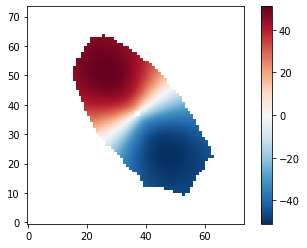

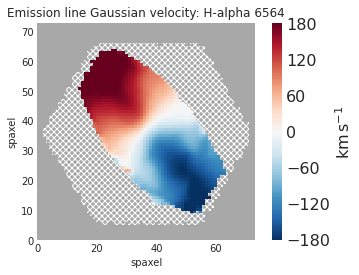

In [185]:
# Initial guesses
param_bounds_NFW_nb = [[np.log10(m_spec), 13],  # Disk mass [log(Msun)]
                [0.1, 20],  # Disk radius [kpc]
                [0.00001, 0.01],  # Halo density [Msun/pc^2]
                [0.1, 100],  # Halo radius [kpc]
                [0.1,np.pi/2], # Inclination angle
                [-np.pi/2,np.pi/2],# Phase angle
                [0.1,40],#center_x
                [0.1,40]] #center_y
p0_NFW_nb = [10, 4, 0.001, 15, 0.5, ph, 37, 37]
bestfit_NFW_nb = minimize(nloglikelihood_NFW_nb, p0_NFW_nb, args=(gal_shape, v_mask, gas_ivar_5),bounds=param_bounds_NFW_nb)
print('---------------------------------------------------')
print(bestfit_NFW_nb)
# Plotting NFW
bestfit_param_NFW_nb = [bestfit_NFW_nb.x[0],bestfit_NFW_nb.x[1],bestfit_NFW_nb.x[2],bestfit_NFW_nb.x[3],bestfit_NFW_nb.x[4],bestfit_NFW_nb.x[5],bestfit_NFW_nb.x[6],bestfit_NFW_nb.x[7]]
model_map_NFW_nb = rot_incl_NFW_nb(gal_shape,bestfit_param_NFW_nb)
mask_model_map_NFW_nb= ma.array(model_map_NFW_nb,mask=gas_vfield_5.mask)
plt.imshow(mask_model_map_NFW_nb,origin='lower',cmap='RdBu_r')
plt.colorbar()
gas_vfield_5.plot()

In [199]:
# Chi-square calculation
chi_square_NFW_nb = np.nansum((v_mask - mask_model_map_NFW_nb) ** 2 * gas_ivar_5)
chi_square_NFW_nb

6512088.410950497

Burket Fitting

[WARNING]: invalid value encountered in double_scalars (RuntimeWarning)
[WARNING]: divide by zero encountered in double_scalars (RuntimeWarning)
[WARNING]: invalid value encountered in double_scalars (RuntimeWarning)
[WARNING]: divide by zero encountered in log (RuntimeWarning)
[WARNING]: The maximum number of subdivisions (50) has been achieved. (IntegrationWarning)
[WARNING]: Warning: converting a masked element to nan. (UserWarning)


---------------------------------------------------
      fun: masked
 hess_inv: <10x10 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 7.42786361e+03,  3.66722525e+01, -7.78816460e+04, -5.21234327e+03,
       -1.78949743e+07, -4.22470877e+03, -5.33771087e+05,  1.35786423e+05,
        1.25835334e+04,  2.43297962e+03])
  message: b'ABNORMAL_TERMINATION_IN_LNSRCH'
     nfev: 495
      nit: 21
     njev: 45
   status: 2
  success: False
        x: array([4.52998856e-01, 1.83501499e+02, 1.05121521e+01, 3.54934235e+00,
       1.00000000e-02, 2.93016739e+01, 1.03910046e+00, 7.41198286e-01,
       3.09762643e+01, 3.08201977e+01])


(<Figure size 432x288 with 2 Axes>,
 <AxesSubplot:title={'center':'Emission line Gaussian velocity: H-alpha 6564'}, xlabel='spaxel', ylabel='spaxel'>)

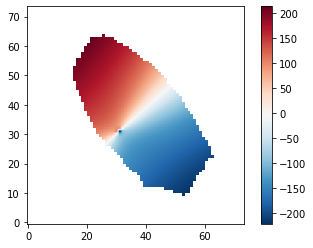

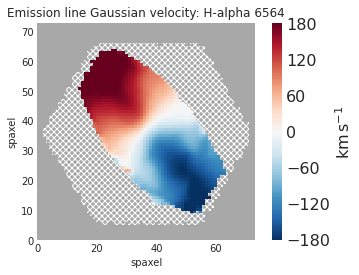

In [188]:
# Initial guesses
param_bounds_bur = [[0.2, 1],  # Scale Factor [unitless]
                [0.001, 1000],  # Bulge Scale Velocity [km/s]
                [np.log10(m_spec), 13],  # Disk mass [log(Msun)]
                [0.1, 20],  # Disk radius [kpc]
                [0.00001, 0.01],  # Halo density [Msun/pc^2]
                [0.1, 100],  # Halo radius [kpc]
                [0.1,np.pi/2], # Inclination angle
                [-np.pi/2,np.pi/2],# Phase angle
                [0.1,40],#center_x
                [0.1,40]] #center_y
p0_bur = [0.4,100,10, 4, 0.001, 15, 0.5,ph,37,37]
bestfit_bur = minimize(nloglikelihood_bur, p0_bur, args=(gal_shape, v_mask, gas_ivar_5),bounds=param_bounds_bur)
print('---------------------------------------------------')
print(bestfit_bur)
# Plotting Bur
bestfit_param_bur = [bestfit_bur.x[0],bestfit_bur.x[1],bestfit_bur.x[2],bestfit_bur.x[3],bestfit_bur.x[4],bestfit_bur.x[5],bestfit_bur.x[6],bestfit_bur.x[7],bestfit_bur.x[8],bestfit_bur.x[9]]
model_map_bur = rot_incl_bur(gal_shape,bestfit_param_bur)
mask_model_map_bur = ma.array(model_map_bur,mask=gas_vfield_5.mask)
plt.imshow(mask_model_map_bur,origin='lower',cmap='RdBu_r')
plt.colorbar()
gas_vfield_5.plot()

In [200]:
# Chi-square calculation
chi_square_bur = np.nansum((v_mask - mask_model_map_bur) ** 2 * gas_ivar_5)
chi_square_bur

337623.45897477854

Burket Fitting w/o Bulge

[WARNING]: invalid value encountered in double_scalars (RuntimeWarning)
[WARNING]: invalid value encountered in double_scalars (RuntimeWarning)
[WARNING]: divide by zero encountered in log (RuntimeWarning)
[WARNING]: The maximum number of subdivisions (50) has been achieved. (IntegrationWarning)
[WARNING]: Warning: converting a masked element to nan. (UserWarning)


---------------------------------------------------
      fun: 48412.39815894331
 hess_inv: <8x8 LbfgsInvHessProduct with dtype=float64>
      jac: array([ -5238.48677716,   1732.18869493,    948.80088   ,      0.        ,
       -32691.46038194,  24973.97423397,    132.60722693,  -4057.21332836])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 2691
      nit: 250
     njev: 299
   status: 0
  success: True
        x: array([1.29681389e+01, 6.81220529e+00, 1.00000000e-05, 2.46581362e+01,
       1.34088294e-01, 6.92330091e-01, 3.46691221e+01, 3.40718971e+01])


(<Figure size 432x288 with 2 Axes>,
 <AxesSubplot:title={'center':'Emission line Gaussian velocity: H-alpha 6564'}, xlabel='spaxel', ylabel='spaxel'>)

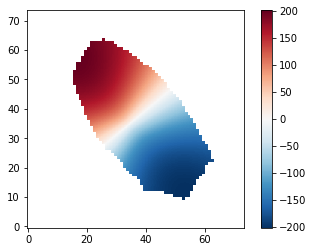

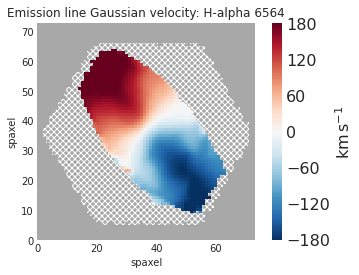

In [186]:
# Initial guesses
param_bounds_bur_nb = [[np.log10(m_spec), 13],  # Disk mass [log(Msun)]
                [0.1, 20],  # Disk radius [kpc]
                [0.00001, 0.01],  # Halo density [Msun/pc^2]
                [0.1, 100],  # Halo radius [kpc]
                [0.1,np.pi/2], # Inclination angle
                [-np.pi/2,np.pi/2],# Phase angle
                [0.1,40],#center_x
                [0.1,40]] #center_y
p0_bur_nb = [10, 4, 0.001, 15, 0.5, ph, 37, 37]
bestfit_bur_nb = minimize(nloglikelihood_bur_nb, p0_bur_nb, args=(gal_shape, v_mask, gas_ivar_5),bounds=param_bounds_bur_nb)
print('---------------------------------------------------')
print(bestfit_bur_nb)
# Plotting Burket
bestfit_param_bur_nb = [bestfit_bur_nb.x[0],bestfit_bur_nb.x[1],bestfit_bur_nb.x[2],bestfit_bur_nb.x[3],bestfit_bur_nb.x[4],bestfit_bur_nb.x[5],bestfit_bur_nb.x[6],bestfit_bur_nb.x[7]]
model_map_bur_nb = rot_incl_bur_nb(gal_shape,bestfit_param_bur_nb)
mask_model_map_bur_nb = ma.array(model_map_bur_nb,mask=gas_vfield_5.mask)
plt.imshow(mask_model_map_bur_nb,origin='lower',cmap='RdBu_r')
plt.colorbar()
gas_vfield_5.plot()

In [201]:
# Chi-square calculation
chi_square_bur_nb = np.nansum((v_mask - mask_model_map_bur_nb) ** 2 * gas_ivar_5)
chi_square_bur_nb

227310.34448002846

# MCMC 

Running the random seed MCMC using the Burket Model with no bulge

In [106]:
def log_prior(params):
    logM,r_d,rho_h,r_h,inclination,phi,center_x,center_y = params
    if 7 < logM < 13 and 0 < r_d < 10 and 0.00001 < rho_h < 0.1 and 0 < r_h< 100 and 0 < inclination < np.pi/2 and -np.pi/2 < phi < np.pi/2 and 0 < center_x < 37 and 0 < center_y < 37:
        return 0.0
    return -np.inf

In [107]:
def log_prob(params, shape, vdata, ivar):
    lp = log_prior(params)
    if not np.isfinite(lp):
        return -np.inf
    return lp + loglikelihood_bur_nb(params, shape, vdata, ivar)

In [108]:
pos = np.random.uniform(low=[9,2,0.0001,9,0,np.pi/9,20,20], high=[12,9,0.05,30,np.pi/2,np.pi/3,40,40], size=(64,8))
nwalkers, ndim = pos.shape

bad_sampler = emcee.EnsembleSampler(nwalkers, ndim, log_prob, args=(gal_shape, v_mask, gas_ivar_5))
bad_sampler.run_mcmc(pos, 1000, progress=True)

[WARNING]: divide by zero encountered in log (RuntimeWarning)
  logL = -0.5 * np.nansum((vdata - model) ** 2 * inv_sigma2 - np.log(inv_sigma2))

  0%|          | 0/1000 [00:00<?, ?it/s][WARNING]: invalid value encountered in double_scalars (RuntimeWarning)
  lnpdiff = f + nlp - state.log_prob[j]

  2%|▏         | 16/1000 [04:55<5:48:47, 21.27s/it][WARNING]: invalid value encountered in double_scalars (RuntimeWarning)
  bessel_component = (iv(0, r / (2 * Rd)) * kn(0, r / (2 * Rd)) - iv(1, r / (2 * Rd)) * kn(1, r / (2 * Rd)))

100%|██████████| 1000/1000 [5:50:12<00:00, 21.01s/it] 


State([[8.70788229e+00 4.20108008e+00 4.57560202e-02 1.04471409e+01
  1.03673026e+00 7.21049036e-01 2.83717306e+01 2.73058771e+01]
 [1.22322263e+01 5.33461961e+00 9.84723821e-02 7.61570063e+01
  2.29422532e-01 7.07752818e-01 3.57383879e+01 3.55920669e+01]
 [1.22239928e+01 5.31571816e+00 9.84714749e-02 8.09106972e+01
  2.30581642e-01 7.07887225e-01 3.57566033e+01 3.56177982e+01]
 [1.21841936e+01 5.21078463e+00 9.82274449e-02 8.98794095e+01
  2.36652792e-01 7.07790294e-01 3.57220575e+01 3.55223694e+01]
 [1.22637285e+01 5.39775027e+00 9.89882004e-02 8.07178812e+01
  2.24177357e-01 7.14016013e-01 3.57767662e+01 3.56586768e+01]
 [1.22125947e+01 5.29281276e+00 9.94684281e-02 8.43227664e+01
  2.32269983e-01 7.12525473e-01 3.56958828e+01 3.55622851e+01]
 [1.22406690e+01 5.35222030e+00 9.85998447e-02 8.11309485e+01
  2.27991961e-01 7.11066314e-01 3.57645668e+01 3.56374612e+01]
 [1.22375273e+01 5.34669716e+00 9.82373452e-02 8.03238619e+01
  2.28523427e-01 7.10031707e-01 3.57688920e+01 3.56292186

[WARNING]: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect. (UserWarning)
  fig.tight_layout()



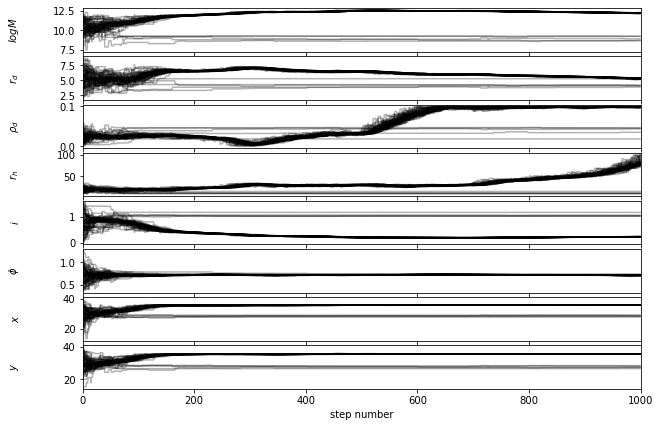

In [109]:
fig, axes = plt.subplots(8,1, figsize=(10, 7), sharex=True,
                         gridspec_kw={'hspace':0.1})
bad_samples = bad_sampler.get_chain()

labels = ['$logM$','$r_{d}$', r'$\rho_d$','$r_h$','$i$',r'$\phi$','$x$','$y$']
for i in range(ndim):
    ax = axes[i]
    ax.plot(bad_samples[:1000,:,i], 'k', alpha=0.3)
    ax.set(xlim=(0,1000), ylabel=labels[i])
    ax.yaxis.set_label_coords(-0.11, 0.5)

axes[-1].set_xlabel('step number')
fig.tight_layout()

In [110]:
good_walkers = bad_sampler.acceptance_fraction > 0

[WARNING]: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect. (UserWarning)
  fig.tight_layout()



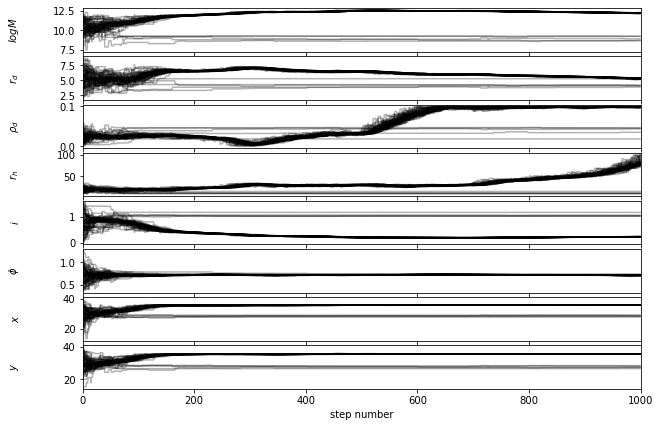

In [111]:
fig, axes = plt.subplots(8,1, figsize=(10, 7), sharex=True,
                         gridspec_kw={'hspace':0.1})
bad_samples = bad_sampler.get_chain()[:,good_walkers,:]

labels = ['$logM$','$r_{d}$', r'$\rho_d$','$r_h$','$i$',r'$\phi$','$x$','$y$']
for i in range(ndim):
    ax = axes[i]
    ax.plot(bad_samples[:1000,:,i], 'k', alpha=0.3)
    ax.set(xlim=(0,1000), ylabel=labels[i])
    ax.yaxis.set_label_coords(-0.11, 0.5)

axes[-1].set_xlabel('step number')
fig.tight_layout()

In [112]:
bad_samples = bad_sampler.get_chain(discard=100)[:,good_walkers,:]
ns, nw, nd = bad_samples.shape
flat_bad_samples = bad_samples.reshape(ns*nw, nd)
flat_bad_samples.shape

(57600, 8)

# Corner Plots

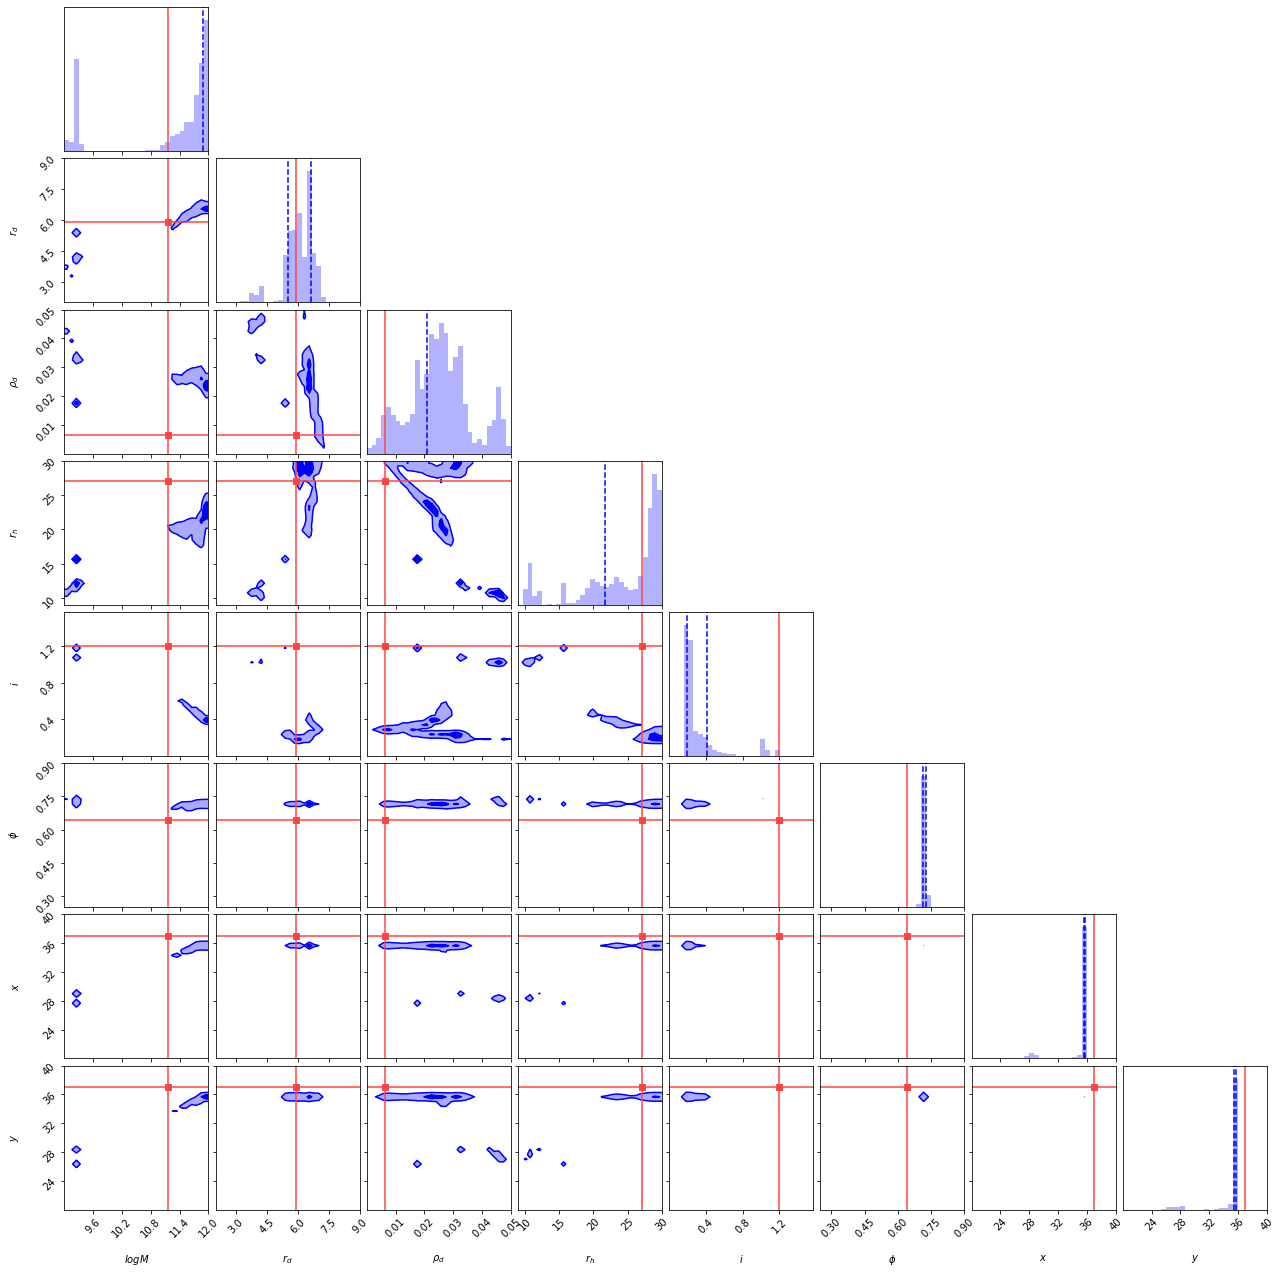

In [115]:
'''
corner.corner(flat_samples, labels=labels,
                    range=[(9,12), (2.5,7.8), (0.00001,0.05),(10.1,19.5),(0.3,0.8),(0.25,0.75),(30,37),(30,37)], bins=30, #smooth=1,
#                     truths=[a_true, b_true, np.log(f_true)], truth_color='#ff4444',
                    levels=(1-np.exp(-0.5), 1-np.exp(-2)), #quantiles=(0.16, 0.84),
                    hist_kwargs={'histtype':'stepfilled', 'alpha':0.3, 'density':True},
                    color='blue', plot_datapoints=False,
                    fill_contours=True);
'''

corner.corner(flat_bad_samples, labels=labels,
                    range=[(9,12), (2,9), (0.00001,0.05),(9,30),(0,np.pi/2),(0.25,0.9),(20,40),(20,40)], bins=30, #smooth=1,
                    truths=[1.11539516e+01, 5.89733600e+00, 6.45350242e-03, 2.70314254e+01, 1.2005955251079776, 0.6421872084106552, 37, 37], truth_color='#ff4444',
                    levels=(1-np.exp(-0.5), 1-np.exp(-2)), quantiles=(0.16, 0.84),
                    hist_kwargs={'histtype':'stepfilled', 'alpha':0.3, 'density':True},
                    color='blue', plot_datapoints=False,
                    fill_contours=True);